2020-07-06 13:50:53 model initialized
2020-07-06 13:50:56 validation dataset created and saved on the disk
Evaluating baseline model on baseline dataset (epoch = 0)
2020-07-06 13:51:02 baseline initialized
Current decode type: sampling
grad_global_norm = 141.08645629882812, clipped_norm = 1.0
Epoch 0 (batch = 0): Loss: -3.512155294418335: Cost: 14.294559478759766
Evaluating candidate model on baseline dataset (callback epoch = 0)
Epoch 0 candidate mean 7.315439224243164, baseline epoch 0 mean 10.646308898925781, difference -3.330869674682617
p-value: 0.0
Update baseline
Evaluating baseline model on baseline dataset (epoch = 0)
alpha was updated to 1.0
Validation score: 7.328499794006348
2020-07-06 13:54:02 Epoch 0: Loss: 0.5513638854026794: Cost: 8.274495124816895
Current decode type: sampling
grad_global_norm = 11.97923469543457, clipped_norm = 1.0
Epoch 1 (batch = 0): Loss: -4.408003330230713: Cost: 7.596805095672607
Evaluating candidate model on baseline dataset (callback epoch = 1)

Rollout greedy execution: 10it [00:03,  2.71it/s]
batch calculation at epoch 0: 250it [02:18,  1.81it/s]
Rollout greedy execution: 10it [00:02,  3.61it/s]
Rollout greedy execution: 10it [00:02,  3.68it/s]
Rollout greedy execution: 10it [00:02,  3.64it/s]
Rollout greedy execution: 63it [00:22,  2.75it/s]
batch calculation at epoch 1: 250it [02:11,  1.90it/s]
Rollout greedy execution: 10it [00:02,  3.48it/s]
Rollout greedy execution: 10it [00:02,  3.62it/s]
Rollout greedy execution: 10it [00:02,  3.65it/s]
Rollout greedy execution: 63it [00:24,  2.58it/s]
batch calculation at epoch 2: 250it [02:13,  1.88it/s]
Rollout greedy execution: 10it [00:02,  3.57it/s]
Rollout greedy execution: 10it [00:02,  3.54it/s]
Rollout greedy execution: 10it [00:02,  3.58it/s]
Rollout greedy execution: 63it [00:23,  2.69it/s]
batch calculation at epoch 3: 250it [02:12,  1.89it/s]
Rollout greedy execution: 10it [00:02,  3.38it/s]
Rollout greedy execution: 10it [00:03,  3.31it/s]
Rollout greedy execution: 10it

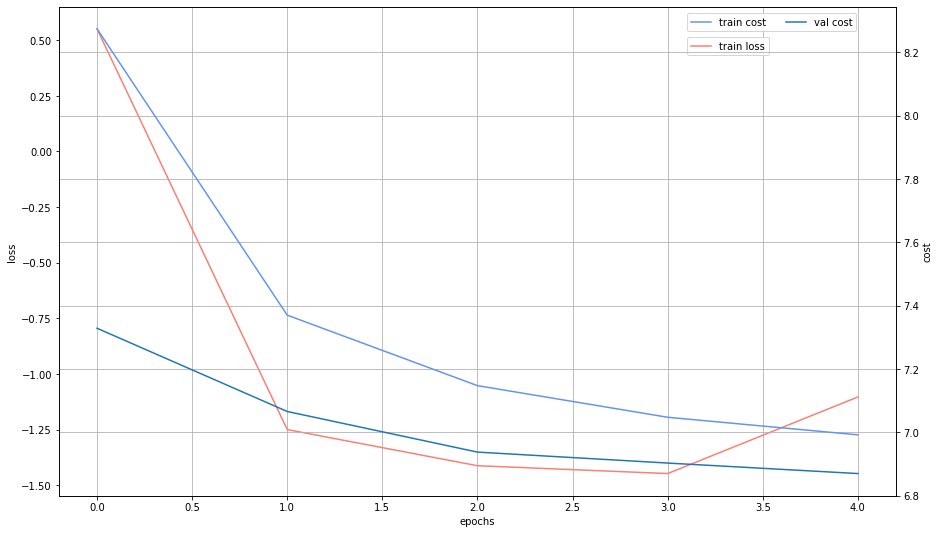

In [1]:
import tensorflow as tf
from time import gmtime, strftime

from attention_model import AttentionModel, set_decode_type
from reinforce_baseline import RolloutBaseline
from train import train_model

from generate_data import create_data_on_disk, get_cur_time


# Params of model
SAMPLES = 128000 # 512*250
BATCH = 512
START_EPOCH = 0
END_EPOCH = 5
FROM_CHECKPOINT = False
embedding_dim = 128
LEARNING_RATE = 0.0001
ROLLOUT_SAMPLES = 10000
NUMBER_OF_WP_EPOCHS = 1
GRAD_NORM_CLIPPING = 1.0
BATCH_VERBOSE = 1000
VAL_BATCH_SIZE = 1000
VALIDATE_SET_SIZE = 10000
SEED = 1234
GRAPH_SIZE = 20
FILENAME = 'VRP_{}_{}'.format(GRAPH_SIZE, strftime("%Y-%m-%d", gmtime()))

# Initialize model
model_tf = AttentionModel(embedding_dim)
set_decode_type(model_tf, "sampling")
print(get_cur_time(), 'model initialized')

# Create and save validation dataset
validation_dataset = create_data_on_disk(GRAPH_SIZE,
                                         VALIDATE_SET_SIZE,
                                         is_save=True,
                                         filename=FILENAME,
                                         is_return=True,
                                         seed = SEED)
print(get_cur_time(), 'validation dataset created and saved on the disk')

# Initialize optimizer
optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)

# Initialize baseline
baseline = RolloutBaseline(model_tf,
                           wp_n_epochs = NUMBER_OF_WP_EPOCHS,
                           epoch = 0,
                           num_samples=ROLLOUT_SAMPLES,
                           filename = FILENAME,
                           from_checkpoint = FROM_CHECKPOINT,
                           embedding_dim=embedding_dim,
                           graph_size=GRAPH_SIZE
                           )
print(get_cur_time(), 'baseline initialized')

train_model(optimizer,
            model_tf,
            baseline,
            validation_dataset,
            samples = SAMPLES,
            batch = BATCH,
            val_batch_size = VAL_BATCH_SIZE,
            start_epoch = START_EPOCH,
            end_epoch = END_EPOCH,
            from_checkpoint = FROM_CHECKPOINT,
            grad_norm_clipping = GRAD_NORM_CLIPPING,
            batch_verbose = BATCH_VERBOSE,
            graph_size = GRAPH_SIZE,
            filename = FILENAME
            )

2020-07-06 14:29:15 model loaded
2020-07-06 14:29:26 validation dataset loaded
Baseline model loaded
Evaluating baseline model on baseline dataset (epoch = 5)
2020-07-06 14:29:32 baseline initialized
Skipping warm-up mode
Current decode type: sampling
grad_global_norm = 5.6745476722717285, clipped_norm = 1.0
Epoch 5 (batch = 0): Loss: -1.0955885648727417: Cost: 6.901490688323975
Evaluating candidate model on baseline dataset (callback epoch = 5)
Epoch 5 candidate mean 6.841063976287842, baseline epoch 5 mean 6.853437423706055, difference -0.01237344741821289
p-value: 0.0016325892768175702
Update baseline
Evaluating baseline model on baseline dataset (epoch = 5)
Validation score: 6.866199970245361
2020-07-06 14:32:41 Epoch 5: Loss: -1.0493627786636353: Cost: 6.956067085266113
Current decode type: sampling
grad_global_norm = 6.5307817459106445, clipped_norm = 0.9999999403953552
Epoch 6 (batch = 0): Loss: -1.049340844154358: Cost: 6.948419094085693
Evaluating candidate model on baseline d

Rollout greedy execution: 10it [00:02,  3.77it/s]
Rollout greedy execution: 63it [00:23,  2.72it/s]
batch calculation at epoch 5: 250it [02:06,  1.98it/s]
Rollout greedy execution: 10it [00:02,  3.68it/s]
Rollout greedy execution: 10it [00:02,  3.59it/s]
Rollout greedy execution: 10it [00:02,  3.54it/s]
Rollout greedy execution: 63it [00:27,  2.29it/s]
batch calculation at epoch 6: 250it [02:16,  1.83it/s]
Rollout greedy execution: 10it [00:02,  3.76it/s]
Rollout greedy execution: 10it [00:02,  3.77it/s]
Rollout greedy execution: 10it [00:02,  3.67it/s]
Rollout greedy execution: 63it [00:21,  2.90it/s]
batch calculation at epoch 7: 250it [02:09,  1.93it/s]
Rollout greedy execution: 10it [00:02,  3.65it/s]
Rollout greedy execution: 10it [00:02,  3.66it/s]
Rollout greedy execution: 10it [00:02,  3.64it/s]
Rollout greedy execution: 63it [00:22,  2.82it/s]
batch calculation at epoch 8: 250it [02:04,  2.00it/s]
Rollout greedy execution: 10it [00:02,  3.40it/s]
Rollout greedy execution: 10it

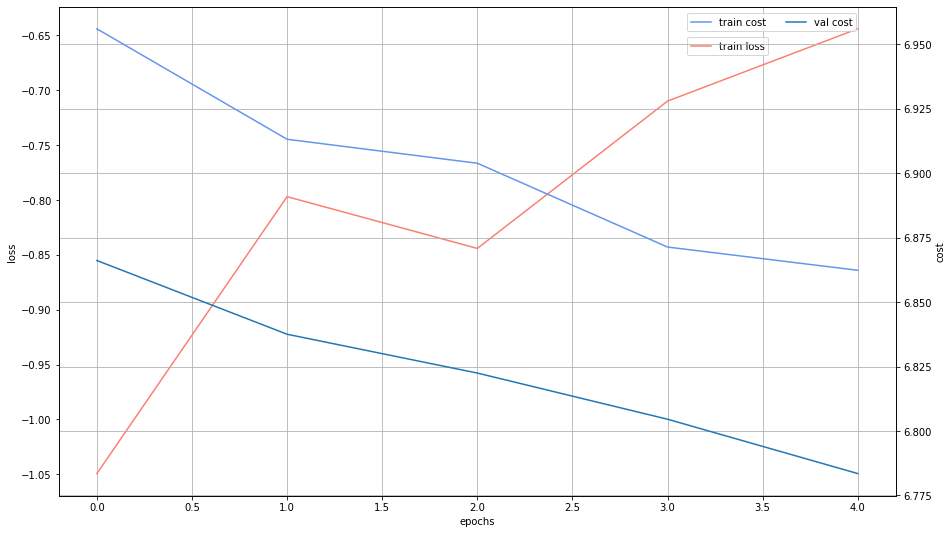

In [3]:
import tensorflow as tf
from time import gmtime, strftime

from attention_model import set_decode_type
from reinforce_baseline import RolloutBaseline
from train import train_model

from generate_data import get_cur_time
from reinforce_baseline import load_tf_model
from generate_data import read_from_pickle


SAMPLES = 128000 # 512*250
BATCH = 512
LEARNING_RATE = 0.0001
ROLLOUT_SAMPLES = 10000
NUMBER_OF_WP_EPOCHS = 1
GRAD_NORM_CLIPPING = 1.0
BATCH_VERBOSE = 1000
VAL_BATCH_SIZE = 1000
VALIDATE_SET_SIZE = 10000
SEED = 1234
GRAPH_SIZE = 20
FILENAME = 'VRP_{}_{}'.format(GRAPH_SIZE, strftime("%Y-%m-%d", gmtime()))

START_EPOCH = 5
END_EPOCH = 10
FROM_CHECKPOINT = True
embedding_dim = 128
MODEL_PATH = 'model_checkpoint_epoch_4_VRP_20_2020-07-06.h5'
VAL_SET_PATH = 'Validation_dataset_VRP_20_2020-07-06.pkl'
BASELINE_MODEL_PATH = 'baseline_checkpoint_epoch_4_VRP_20_2020-07-06.h5'

# Initialize model
model_tf = load_tf_model(MODEL_PATH,
                         embedding_dim=embedding_dim,
                         graph_size=GRAPH_SIZE)
set_decode_type(model_tf, "sampling")
print(get_cur_time(), 'model loaded')

# Create and save validation dataset
validation_dataset = read_from_pickle(VAL_SET_PATH)
print(get_cur_time(), 'validation dataset loaded')

# Initialize optimizer
optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)

# Initialize baseline
baseline = RolloutBaseline(model_tf,
                           wp_n_epochs = NUMBER_OF_WP_EPOCHS,
                           epoch = START_EPOCH,
                           num_samples=ROLLOUT_SAMPLES,
                           filename = FILENAME,
                           from_checkpoint = FROM_CHECKPOINT,
                           embedding_dim=embedding_dim,
                           graph_size=GRAPH_SIZE,
                           path_to_checkpoint = BASELINE_MODEL_PATH)
print(get_cur_time(), 'baseline initialized')

train_model(optimizer,
            model_tf,
            baseline,
            validation_dataset,
            samples = SAMPLES,
            batch = BATCH,
            val_batch_size = VAL_BATCH_SIZE,
            start_epoch = START_EPOCH,
            end_epoch = END_EPOCH,
            from_checkpoint = FROM_CHECKPOINT,
            grad_norm_clipping = GRAD_NORM_CLIPPING,
            batch_verbose = BATCH_VERBOSE,
            graph_size = GRAPH_SIZE,
            filename = FILENAME
            )